a lot of this code came from:

https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

In [2]:
airbnb = pd.read_csv('../data/preprocessing/airbnb.csv')

In [3]:
airbnb.columns

Index(['the_geom', 'OBJECTID', 'geoid', 'Median Sales Price',
       'PercentShortTermRentals', 'geometry', 'index_right', 'id', 'name',
       'description', 'neighborhood_overview', 'host_name', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'review

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   the_geom                        2222 non-null   object 
 1   OBJECTID                        2222 non-null   int64  
 2   geoid                           2222 non-null   int64  
 3   Median Sales Price              2222 non-null   float64
 4   PercentShortTermRentals         2222 non-null   float64
 5   geometry                        2222 non-null   object 
 6   index_right                     2222 non-null   int64  
 7   id                              2222 non-null   int64  
 8   name                            2222 non-null   object 
 9   description                     2222 non-null   object 
 10  neighborhood_overview           2222 non-null   object 
 11  host_name                       2222 non-null   object 
 12  host_location                   22

In [5]:
vectorizer_description = TfidfVectorizer(stop_words = "english")# ignores words like 'a'
vectorizer_neighborhood= TfidfVectorizer(stop_words = 'english')
kmeans = KMeans(n_clusters = 10, max_iter = 100)

In [6]:
description = vectorizer_description.fit_transform(airbnb.description) #transforms descriptions
neighbor_ovrvw = vectorizer_neighborhood.fit_transform(airbnb.neighborhood_overview) #transforms neighborhood description

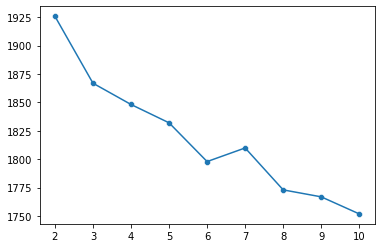

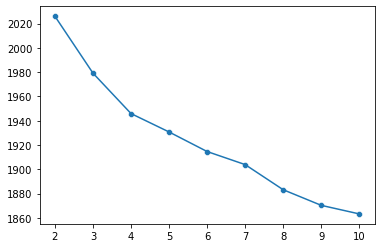

In [7]:
for matrix in [description, neighbor_ovrvw]:
    sse = {}
    for k in np.arange(2,11):
        kmeans = KMeans(n_clusters = k, random_state = 0, init='k-means++')
        kmeans.fit(matrix)
        sse[k] = kmeans.inertia_
    plt.xticks=(list(np.arange(2,11)))
    sns.lineplot(data = sse)
    sns.scatterplot(data = sse)
    plt.show()

In [8]:
description_mod = KMeans(n_clusters = 6, random_state = 0, init='k-means++')
neighborhood_mod = KMeans(n_clusters = 4, random_state = 0, init='k-means++')

In [9]:
description_mod.fit(description)
neighborhood_mod.fit(neighbor_ovrvw)

KMeans(n_clusters=4, random_state=0)

In [10]:
features_description = vectorizer_description.get_feature_names()
features_neighborhood = vectorizer_neighborhood.get_feature_names()

In [11]:
len(features_description)

9441

In [12]:
clusters_description = description_mod.cluster_centers_.argsort()[:,::-1]
clusters_neighborhood = neighborhood_mod.cluster_centers_.argsort()[:,::-1]

In [13]:
for i in range(6):
    print('Cluster %d:' % i),
    for ind in clusters_description[i, :10]:
        print(' %s' % features_description[ind])

Cluster 0:
 br
 new
 home
 orleans
 space
 french
 house
 street
 quarter
 bedroom
Cluster 1:
 br
 sextant
 property
 groups
 stay
 cleaned
 home
 professionally
 outlined
 properly
Cluster 2:
 virtual
 br
 24
 spaces
 check
 leaders
 cleveland
 signage
 experts
 seals
Cluster 3:
 br
 access
 guest
 home
 room
 house
 space
 new
 private
 bedroom
Cluster 4:
 br
 best
 cleaning
 staff
 desinfection
 cleanings
 specialized
 comfortable
 highly
 deep
Cluster 5:
 hosteeva
 br
 standard
 check
 hotel
 smart
 visiting
 cleaning
 high
 home


In [14]:
cluster = []
for row in description:
    cluster.append(description_mod.predict(description))

In [15]:
airbnb['description_group'] = description_mod.predict(description)

In [16]:
airbnb.description_group

0       1
1       2
2       0
3       2
4       3
       ..
2217    5
2218    5
2219    5
2220    0
2221    0
Name: description_group, Length: 2222, dtype: int32

In [17]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   the_geom                        2222 non-null   object 
 1   OBJECTID                        2222 non-null   int64  
 2   geoid                           2222 non-null   int64  
 3   Median Sales Price              2222 non-null   float64
 4   PercentShortTermRentals         2222 non-null   float64
 5   geometry                        2222 non-null   object 
 6   index_right                     2222 non-null   int64  
 7   id                              2222 non-null   int64  
 8   name                            2222 non-null   object 
 9   description                     2222 non-null   object 
 10  neighborhood_overview           2222 non-null   object 
 11  host_name                       2222 non-null   object 
 12  host_location                   22

In [18]:
description.shape

(2222, 9441)

In [19]:
for i in range(4):
    print('Cluster %d:' % i),
    for ind in clusters_neighborhood[i, :10]:
        print(' %s' % features_neighborhood[ind])

Cluster 0:
 neighborhood
 br
 new
 city
 french
 street
 quarter
 orleans
 st
 restaurants
Cluster 1:
 br
 smoothie
 king
 audubon
 arena
 blues
 jackson
 center
 armstrong
 condo
Cluster 2:
 miles
 br
 airport
 parks
 include
 away
 nearby
 superdome
 mercedes
 international
Cluster 3:
 business
 district
 central
 polished
 dynamic
 indulge
 grab
 architectural
 colorful
 south


In [20]:
airbnb['neighborhood_description'] = neighborhood_mod.predict(neighbor_ovrvw) 

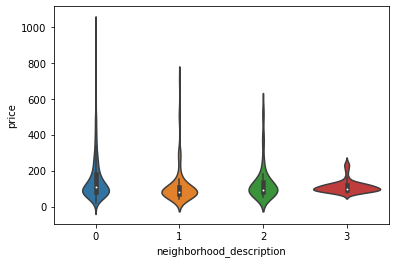

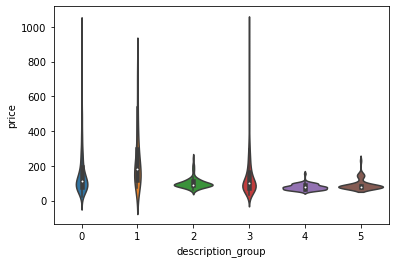

In [21]:
sns.violinplot(data = airbnb, y = 'price', x = 'neighborhood_description')
plt.show()
sns.violinplot(data = airbnb, y = 'price', x = 'description_group')
plt.show()

These plots, especially the neighborhood_descriptions, appear to show some relationship to price and the new features. At least for outliers.

In [22]:
neighbor_ovrvw.shape

(2222, 6124)

In [23]:
sparse_matrix = hstack([description, neighbor_ovrvw])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(sparse_matrix, airbnb.price)

In [27]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
y_pred = rf.predict(X_test)

In [29]:
r2_score(y_test, y_pred)

0.21801402151115568

In [33]:
airbnb = airbnb[['neighborhood_description', 'description_group']]

In [34]:
airbnb.head()

,neighborhood_description,description_group
0,0,1
1,0,2
2,0,0
3,0,2
4,0,3


In [35]:
airbnb.to_csv(r'../data/modeling/text_data.csv')
